In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df_actual = pd.read_csv('current_ds.csv')
df_forecast = pd.read_csv('forecasted_kw_ds.csv')


In [48]:
df_actual.head()

,timestamp,energy_kwh
0,2023-10-25 00:00:00,1.25
1,2023-10-25 01:00:00,1.10
2,2023-10-25 02:00:00,1.05
3,2023-10-25 03:00:00,1.02
4,2023-10-25 04:00:00,1.15


In [49]:
df_forecast.head()

#The actual and forecasted values are very close to each other.

,timestamp,forecast_kwh
0,2023-10-25 00:00:00,1.30
1,2023-10-25 01:00:00,1.15
2,2023-10-25 02:00:00,1.08
3,2023-10-25 03:00:00,1.00
4,2023-10-25 04:00:00,1.10


In [50]:
#The datasets are merged to align actual and forecasted values by the same timestamp.

df = pd.merge(df_actual, df_forecast, on='timestamp')

In [51]:
df.head()

,timestamp,energy_kwh,forecast_kwh
0,2023-10-25 00:00:00,1.25,1.30
1,2023-10-25 01:00:00,1.10,1.15
2,2023-10-25 02:00:00,1.05,1.08
3,2023-10-25 03:00:00,1.02,1.00
4,2023-10-25 04:00:00,1.15,1.10


In [52]:
# MAE, which is commonly used, is chosen to measure the average absolute error between actual and forecasted values.

mae = np.mean(np.abs(df['energy_kwh'] - df['forecast_kwh']))
print("Mean Absolute Error (MAE):", mae)

#MAE value of 0.087 indicates that the average difference between actual and forecasted values is small.

Mean Absolute Error (MAE): 0.08749999999999987


In [53]:
# RMSE is used to evaluate forecasting accuracy and penalizes larger errors
rmse = np.sqrt(np.mean((df['energy_kwh'] - df['forecast_kwh']) ** 2))

In [54]:
print("RMSE ROot Mean SQuared Error:", rmse)
# Since the energy kWh values are around 1–1.3, an RMSE of 0.096 indicates a relatively low prediction error.

RMSE ROot Mean SQuared Error: 0.09656603957913969


In [55]:
correlation = df['energy_kwh'].corr(df['forecast_kwh'])
print("Correlation Coefficient:", correlation)

# Correlation coefficient of 0.998 indicates a very strong positive relationship between actual and forecasted values.

Correlation Coefficient: 0.9983658272192345


In [56]:
df['error'] = df['energy_kwh'] - df['forecast_kwh'] # residuals


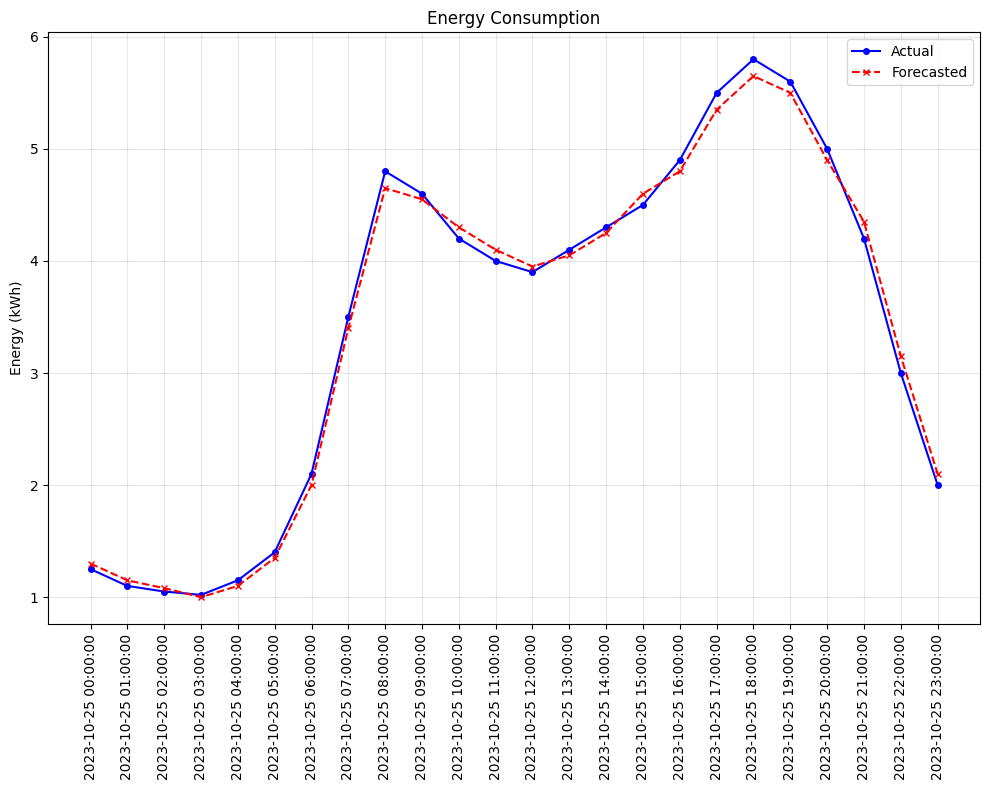

In [57]:
# Let s plot
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.plot(df['timestamp'], df['energy_kwh'], label='Actual', color='blue', marker='o',
         markersize=4)

ax1.plot(df['timestamp'], df['forecast_kwh'], label='Forecasted', color='red',
         linestyle="--", marker='x',markersize=4)
ax1.set_title("Energy Consumption")
ax1.set_ylabel("Energy (kWh)")
ax1.legend()
ax1.grid(True, alpha=0.3) # 1 = 100% percentage
                          # 0 = means total transparency


ax1.set_xticks(df['timestamp'])
ax1.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()
# RGB RED GREEN BLUE -> JPEG,JPG
# RGBL Red Green Blue Alpha-> PNG, .TIFF
# where Alpha represents the transparency of our image/plot/graph

# The unnecessary empty subplot was removed, and the x-axis timestamps were rotated to improve readability.
# The actual and forecasted curves are very close, indicating that we have a good forecasting performance.





/tmp/ipython-input-1807438821.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


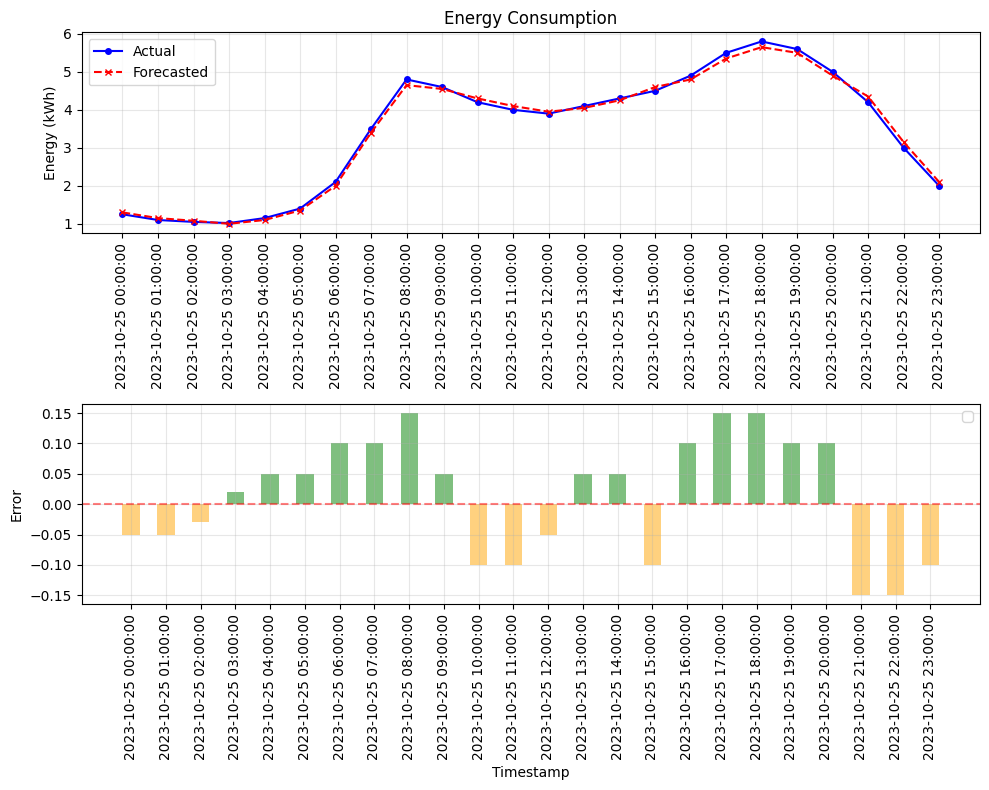

In [60]:
# Let s plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(df['timestamp'], df['energy_kwh'], label='Actual', color='blue', marker='o',
         markersize=4)

ax1.plot(df['timestamp'], df['forecast_kwh'], label='Forecasted', color='red',
         linestyle="--", marker='x',markersize=4)
ax1.set_title("Energy Consumption")
ax1.set_ylabel("Energy (kWh)")
ax1.legend()
ax1.grid(True, alpha=0.3)


colors = ['green' if x>0 else 'orange' for x in df['error']]
ax2.bar(df['timestamp'], df['error'], color=colors, width=0.5, alpha=0.5)
ax2.axhline(0, color='red', linestyle='--', alpha=0.5)
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Error')
ax2.legend()
ax2.grid(True, alpha=0.3)

ax1.set_xticks(df['timestamp'])
ax1.tick_params(axis='x', rotation=90)
ax2.set_xticks(df['timestamp'])
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# Residual analysis helps identify whether errors are random or predictable.
# In this case, the residuals fluctuate randomly (white noise) around zero with no clear trend, indicating that the model has successfully learned the main patterns of the time series. It is a good model.
